# Notebook for initial analysis of the Tidal Data

## From this code we can start generating useful functions

In [1]:
import numpy as np
import pandas as pd

## Load the tidal csv data and put into a single dataframe and create a useful datetime index

In [27]:
NeahBay_2015 = pd.read_csv("../Data/2015_NeahBay.csv",parse_dates=['Date Time'])
NeahBay_2016 = pd.read_csv("../Data/2016_NeahBay.csv",parse_dates=['Date Time'])
NeahBay = NeahBay_2015.append(NeahBay_2016)
del NeahBay_2015, NeahBay_2016

In [16]:
NeahBay_datetime = pd.DatetimeIndex(NeahBay['Date Time'])

### Just do some plotting to make sure the data looks reasonable

In [5]:
%matplotlib inline

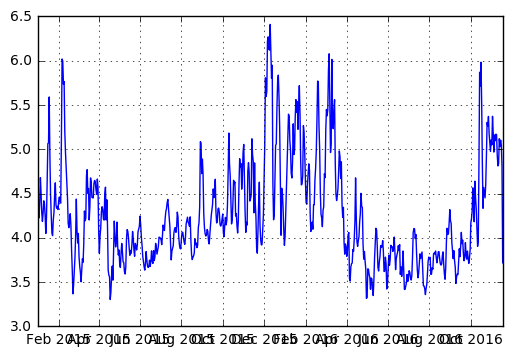

In [34]:
# Plot the daily mean of the tides data from Neah Bay stations
NeahBay[' Water Level'].groupby(NeahBay_datetime.date).mean().plot().grid()

In [24]:
# Load the Port Angeles tidal data and put into one dataframe
PortAngeles_2015 = pd.read_csv('../Data/2015_PortAngeles.csv',parse_dates=['Date Time'])
PortAngeles_2016 = pd.read_csv('../Data/2016_PortAngeles.csv',parse_dates=['Date Time'])
PortAngeles = PortAngeles_2015.append(PortAngeles_2016)
del PortAngeles_2015, PortAngeles_2016

In [25]:
PortAngeles_datetime = pd.DatetimeIndex(PortAngeles['Date Time'])

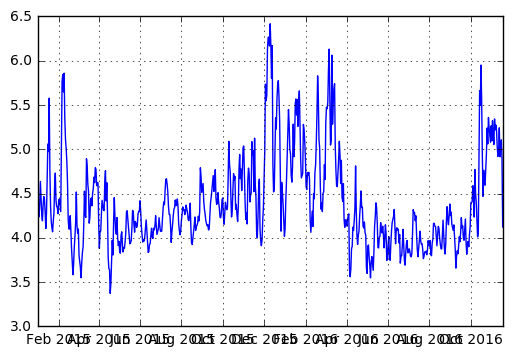

In [35]:
# Plot the daily mean of the tides data from Port Angeles stations
PortAngeles[' Water Level'].groupby(PortAngeles_datetime.date).mean().plot().grid()

In [30]:
PortTownsend_2015 = pd.read_csv('../Data/2015_PortTownsend.csv',parse_dates=['Date Time'])
PortTownsend_2016 = pd.read_csv('../Data/2016_PortTownsend.csv',parse_dates=['Date Time'])
PortTownsend = PortTownsend_2015.append(PortTownsend_2016)
del PortTownsend_2015, PortTownsend_2016

In [31]:
PortTownsend_datetime = pd.DatetimeIndex(PortTownsend['Date Time'])

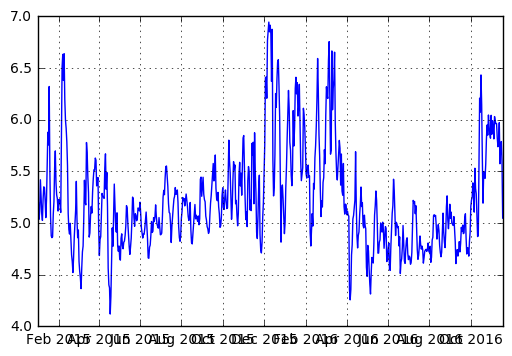

In [36]:
# Plot the daily mean of the tides data from Port Townsend stations
PortTownsend[' Water Level'].groupby(PortTownsend_datetime.date).mean().plot().grid()